## Model Training 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [5]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [7]:
df = df.drop(['day','month','year'],axis = 1)

In [8]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [9]:
df['Classes'] = np.where(df['Classes'].str.contains("not fire"),0,1)

In [10]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [12]:
X =df.drop('FWI',axis =1)
y = df['FWI']

In [13]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [14]:
## Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)

In [18]:
X_train.shape

(182, 11)

In [58]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.629848,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.717804,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,-0.023558,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.345707,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.750799,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.685656,0.617273,0.212582
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,1.000000,0.742977,0.296441
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.742977,1.000000,0.188837
Region,0.254549,-0.394665,-0.199969,-0.059022,0.249514,0.212582,0.296441,0.188837,1.000000


<Axes: >

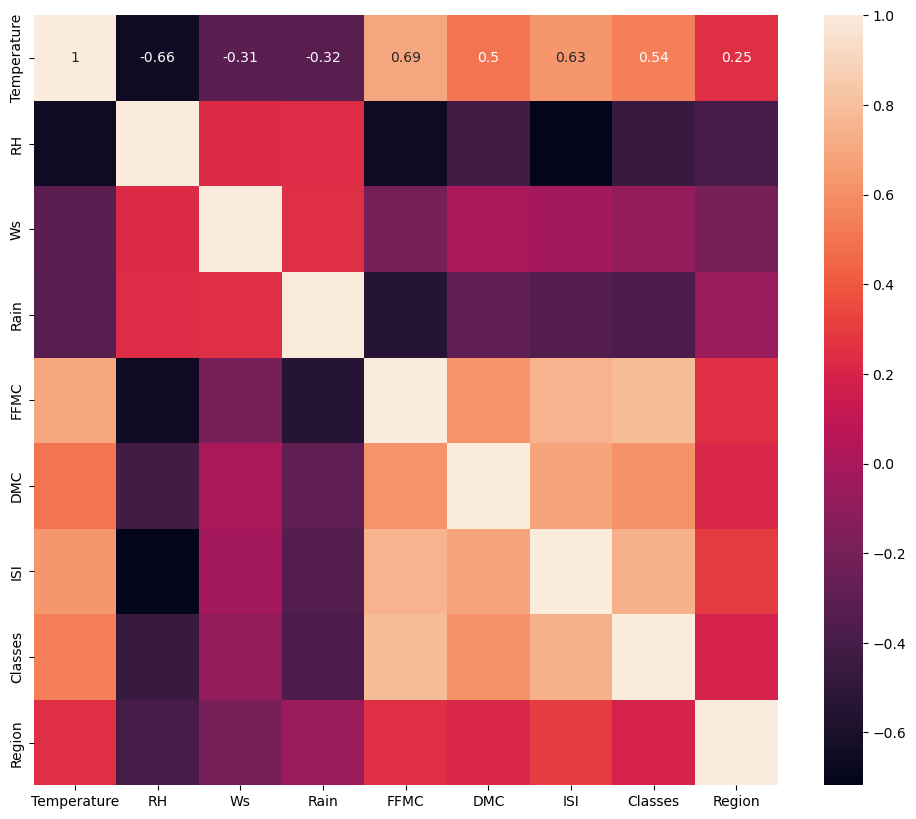

In [64]:
## Check for multicollinearity 
import seaborn as sns
plt.figure(figsize=(12,10))
corr = X_train.corr()
sns.heatmap(corr,annot =True)

In [65]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [67]:
correlation(X_train,0.85)


set()

In [68]:
## drop features when correlation is more than0.85 
X_train.drop(corr_features,axis=1,inplace =True)
X_test.drop(corr_features,axis =1,inplace = True)
X_train.shape,X_test.shape

((182, 9), (61, 9))

## Feature sclassing or Standardization

In [69]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

## Box Plot

Text(0.5, 1.0, 'X_train After Scaling')

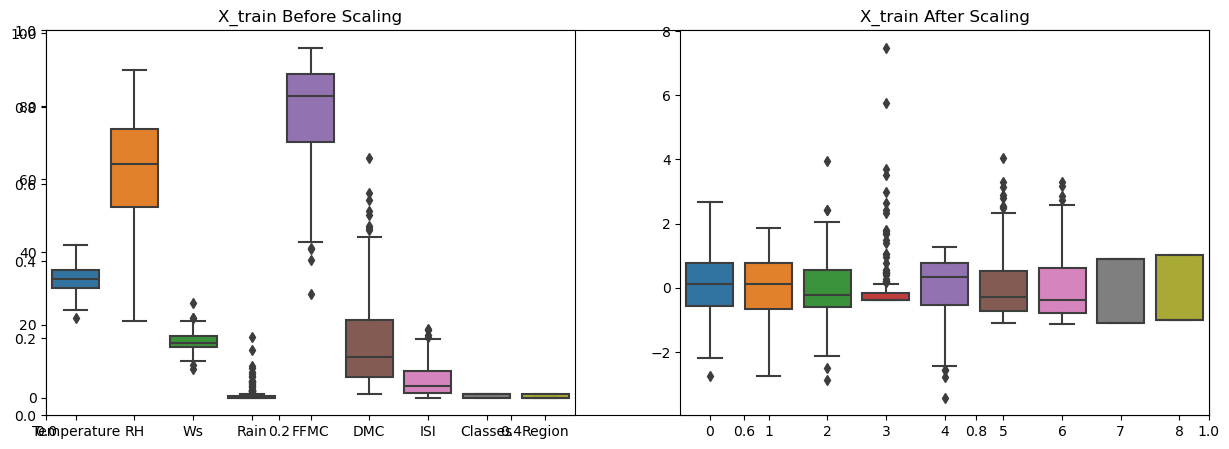

In [70]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data =X_train)
plt.title('X_train Before Scaling')
plt.subplot(1,2,2)
sns.boxplot(data = X_train_scaled)
plt.title('X_train After Scaling')

# Linear Regression Model

Mean Absolute Error: 0.5468236465249977
R2 Score:  0.9847657384266952


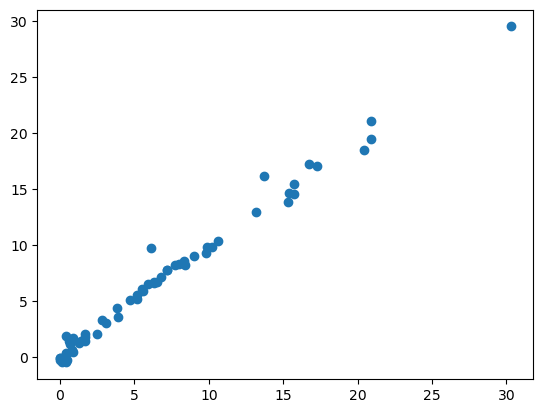

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg =LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred = linreg.predict(X_test_scaled)
mae =mean_absolute_error(y_test,y_pred)
score =r2_score(y_test,y_pred)
print("Mean Absolute Error:" , mae)
print("R2 Score: ",score)
plt.scatter(y_test,y_pred)

## Laaso Regression

Mean Absolute Error: 1.1331759949144087
R2 Score:  0.9492020263112388


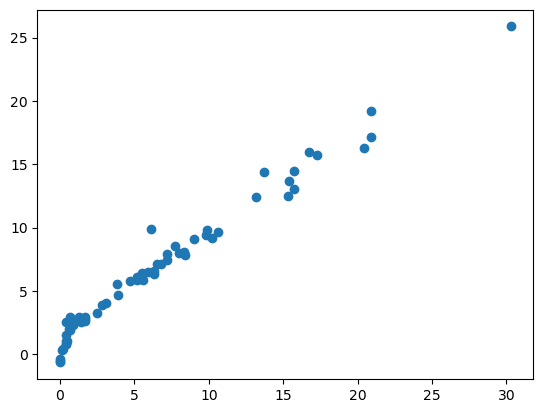

In [78]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linlas =Lasso()
linlas.fit(X_train_scaled,y_train)
y_pred = linlas.predict(X_test_scaled)
mae =mean_absolute_error(y_test,y_pred)
score =r2_score(y_test,y_pred)
print("Mean Absolute Error:" , mae)
print("R2 Score: ",score)
plt.scatter(y_test,y_pred)

Mean Absolute Error: 0.5642305340105683
R2 Score:  0.9842993364555513


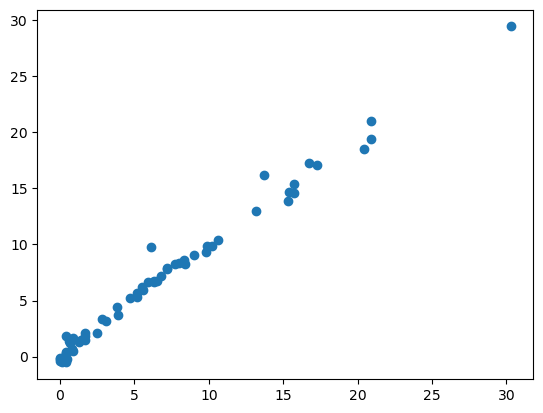

In [79]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linrid =Ridge()
linrid.fit(X_train_scaled,y_train)
y_pred = linrid.predict(X_test_scaled)
mae =mean_absolute_error(y_test,y_pred)
score =r2_score(y_test,y_pred)
print("Mean Absolute Error:" , mae)
print("R2 Score: ",score)
plt.scatter(y_test,y_pred)

## Lasso Cross Validation

Mean absolute error 0.5642305340105683
R2 Score:  0.9842993364555513


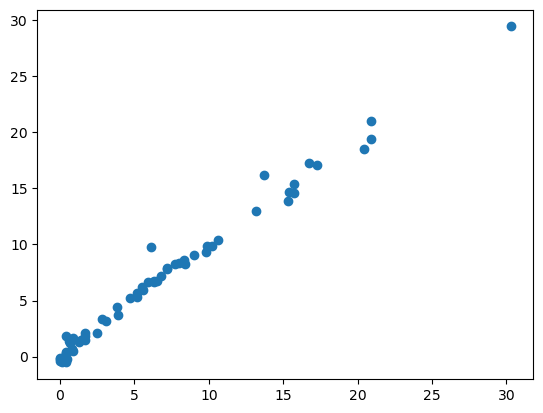

In [80]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV()
lassocv= RidgeCV(cv =5)
lassocv.fit(X_train_scaled,y_train)
y_pred = lassocv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score: ", score)

## RidgeCV cross Validation

Mean absolute error 0.5642305340105683
R2 Score:  0.9842993364555513


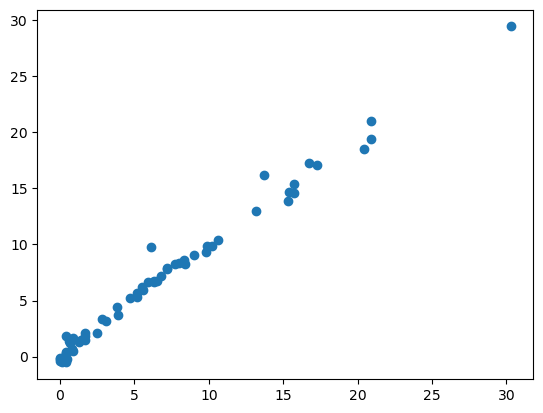

In [75]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error
ridgecv= RidgeCV(cv =5)
ridgecv.fit(X_train_scaled,y_train)
y_pred = ridgecv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score: ", score)

## ElasticNet Cross Validation

Mean absolute error 0.6575946731430902
R2 Score:  0.9814217587854941


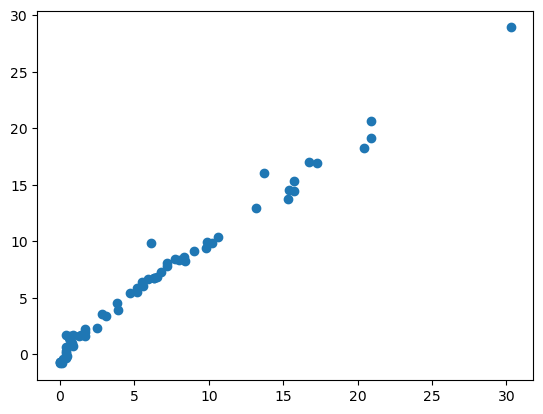

In [76]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error
elasticcv= ElasticNetCV(cv =5)
elasticcv.fit(X_train_scaled,y_train)
y_pred = elasticcv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score: ", score)

In [81]:
##Pickle the machine learning models, preprocessing model standardscaler


In [82]:
scaler

StandardScaler()

In [84]:
linrid

Ridge()

In [86]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(linrid,open('ridge.pkl','wb'))